## Lab03 - Image Processing and Analysis
**Full name:** Đinh Anh Huy - 
**ID Student:** 18110103

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
from pylab import imread, imsave
from skimage.color import rgb2gray

In [2]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
    # Convert ImageData and LabelData to List
    from matplotlib import pyplot as plt
    ImageArray = list(ImageData)
    LabelArray = list(LabelData)
    if(rows == 1 & cols == 1):
        fig = plt.figure(figsize=(20,20))
    else:
        fig = plt.figure(figsize=(cols*8,rows*5))
        
    for i in range(1, cols * rows + 1):
        fig.add_subplot(rows, cols, i)
        image = ImageArray[i - 1]
        # If the channel number is less than 3, we display as grayscale image
        # otherwise, we display as color image
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
            plt.grid(gridType)
        else:
            plt.imshow(image)
            plt.grid(gridType)
        plt.title(LabelArray[i - 1])
    plt.show()
def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

In [3]:
def read_image(img_name):
    img_color = imread(img_name)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
    img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
    return (img_color, img_gray, img_hsv)

## Bài tập 1
**Chọn 1 ảnh từ internet bất kỳ và thực hiện các thao tác sau**

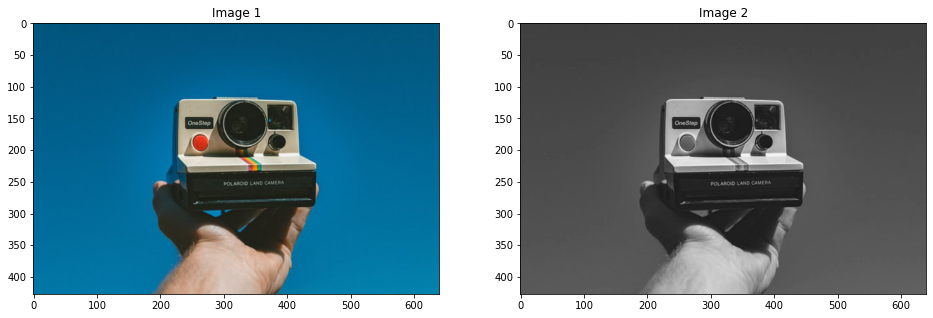

In [4]:
# Read Image
img_color, img_gray = read_image("camera.jpg")[:2]
# Display Image
ShowTwoImages(img_color, img_gray)

**Làm mờ ảnh với các kernel 3x3 và 5x5.**

Filtering Kernel 3x3:


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

Filtering Kernel 5x5:


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

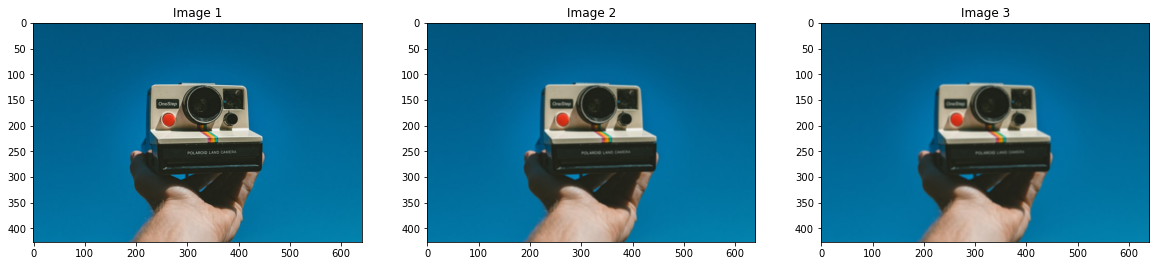

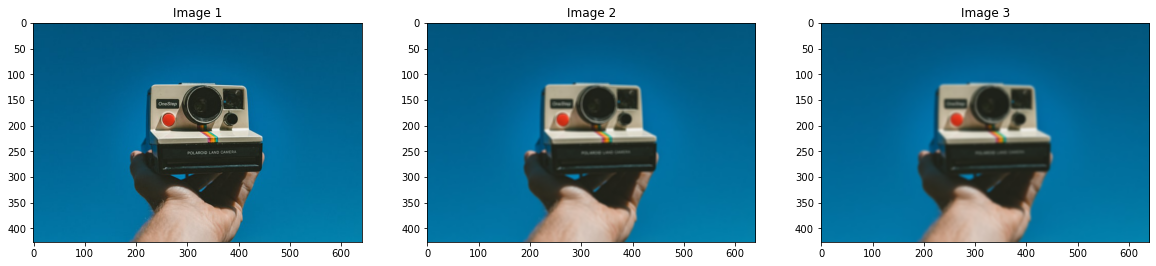

In [5]:
kernel_3_3 = np.ones((3,3),np.float32)/9
kernel_5_5 = np.ones((5,5),np.float32)/25
print("Filtering Kernel 3x3:")
display(kernel_3_3)
print("Filtering Kernel 5x5:")
display(kernel_5_5)
img_filter_3_3_01 = cv2.filter2D(img_color,-1,kernel_3_3)
img_filter_3_3_02 = cv2.filter2D(img_filter_3_3_01,-1,kernel_3_3)
img_filter_5_5_01 = cv2.filter2D(img_color,-1,kernel_5_5)
img_filter_5_5_02 = cv2.filter2D(img_filter_5_5_01,-1,kernel_5_5)
ShowThreeImages(img_color, img_filter_3_3_01, img_filter_3_3_02)
ShowThreeImages(img_color, img_filter_5_5_01, img_filter_5_5_02)

**Xuất giá trị đo mức độ mờ.**

In [6]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

def measurement(src_img, img_filter_01, img_filter_02):
    measurement_src = variance_of_laplacian(src_img)
    measurement_01 = variance_of_laplacian(img_filter_01)
    measurement_02 = variance_of_laplacian(img_filter_02)
    return [measurement_src, measurement_01, measurement_02]

In [7]:
bm, bm_3_3_01, bm_3_3_02 = \
        measurement(img_color, img_filter_3_3_01, img_filter_3_3_02)
print("Blur Measurement of img_color:", bm)
print("Blur Measurement of img_filter_3_3_01:", bm_3_3_01)
print("Blur Measurement of img_filter_3_3_02:", bm_3_3_02)

Blur Measurement of img_color: 253.26032867668704
Blur Measurement of img_filter_3_3_01: 29.53553375539524
Blur Measurement of img_filter_3_3_02: 12.082170900136267


In [8]:
bm, bm_5_5_01, bm_5_5_02 = \
        measurement(img_color, img_filter_5_5_01, img_filter_5_5_02)
print("Blur Measurement of img_color:", bm)
print("Blur Measurement of img_filter_5_5_01:", bm_5_5_01)
print("Blur Measurement of img_filter_5_5_02:", bm_5_5_02)

Blur Measurement of img_color: 253.26032867668704
Blur Measurement of img_filter_5_5_01: 9.410652078119577
Blur Measurement of img_filter_5_5_02: 3.0609301763198307


**Viết dòng thông tin về giá trị mức độ mờ trên ảnh.**

In [9]:
def text_img(img_filter, blur_measurement = None, text = None, color = (65, 215, 152)):
    bm = blur_measurement
    img_filter_text = img_filter.copy()
    if bm != None:
        cv2.putText(img_filter_text, "{}: {:.2f}".format(text, bm), (10, 30), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
    else:
        cv2.putText(img_filter_text, "{}".format(text), (10, 30), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
    return img_filter_text

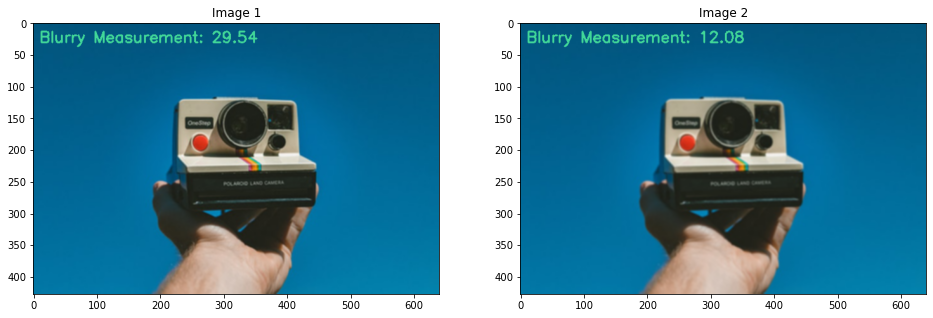

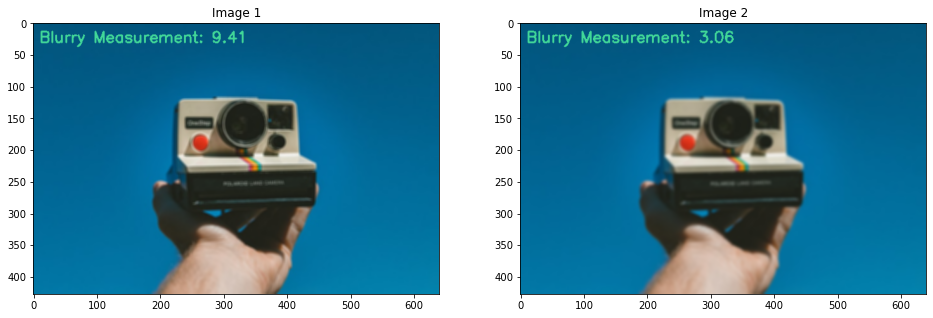

In [10]:
text = "Blurry Measurement"
img_filter_3_3_01_text = text_img(img_filter_3_3_01, bm_3_3_01, text)
img_filter_3_3_02_text = text_img(img_filter_3_3_02, bm_3_3_02, text)
img_filter_5_5_01_text = text_img(img_filter_5_5_01, bm_5_5_01, text)
img_filter_5_5_02_text = text_img(img_filter_5_5_02, bm_5_5_02, text)
ShowTwoImages(img_filter_3_3_01_text, img_filter_3_3_02_text)
ShowTwoImages(img_filter_5_5_01_text, img_filter_5_5_02_text)

## Bài tập 2
**Tìm 1 ảnh trên internet và thực hiện các bước sau**

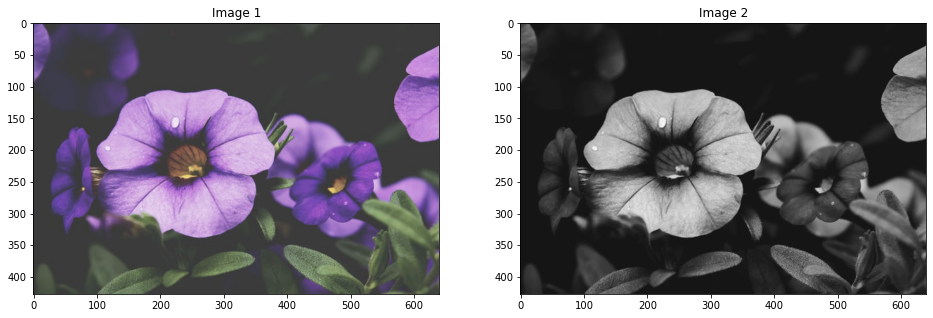

In [11]:
# Read Image
img_color, img_gray = read_image("flower2.jpg")[:2]
# Display Image
ShowTwoImages(img_color, img_gray)

**Làm rõ ảnh với các kernel 3x3 và 5x5.**

In [12]:
def kernel_sharpen(size):
    kernel = np.ones(size) * (-1)
    h, w = size
    kernel[h//2, w//2] = h * w
    return kernel

Filtering kernel_sharpen_33:


array([[-1., -1., -1.],
       [-1.,  9., -1.],
       [-1., -1., -1.]])

Filtering kernel_sharpen_55:


array([[-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., 25., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.]])

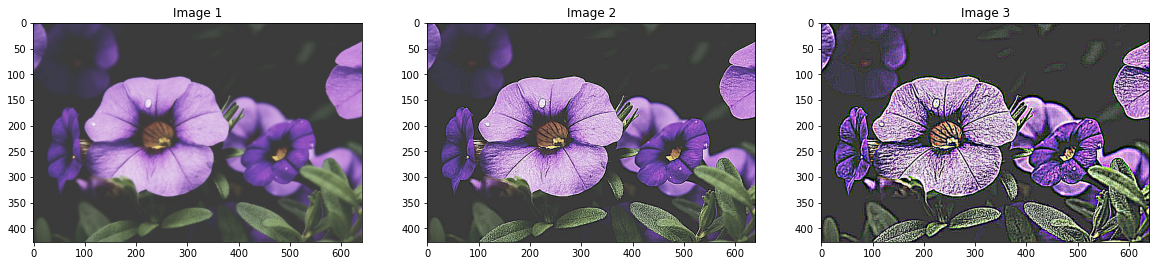

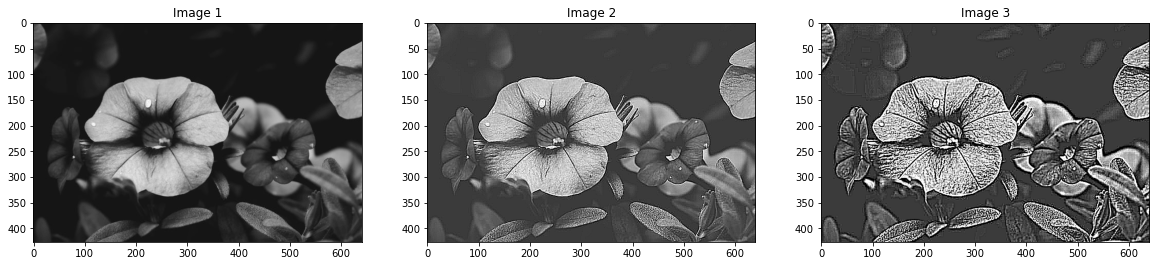

In [13]:
kernel_sharpen_33 = kernel_sharpen((3, 3))
kernel_sharpen_55 = kernel_sharpen((5, 5))

print("Filtering kernel_sharpen_33:")
display(kernel_sharpen_33)

print("Filtering kernel_sharpen_55:")
display(kernel_sharpen_55)

img_color_sharpen_33 = cv2.filter2D(img_color, -1, kernel_sharpen_33)
img_gray_sharpen_33 = cv2.filter2D(img_gray, -1, kernel_sharpen_33)
img_color_sharpen_55 = cv2.filter2D(img_color, -1, kernel_sharpen_55)
img_gray_sharpen_55 = cv2.filter2D(img_gray, -1, kernel_sharpen_55)

ShowThreeImages(img_color, img_color_sharpen_33, img_color_sharpen_55)
ShowThreeImages(img_gray, img_gray_sharpen_33, img_gray_sharpen_55)

**Xuất giá trị đo mức độ rõ.**

In [14]:
sm_color, sm_color_33, sm_color_55 = measurement(img_color, img_color_sharpen_33, img_color_sharpen_55)
sm_gray, sm_gray_33, sm_gray_55 = measurement(img_gray, img_gray_sharpen_33, img_gray_sharpen_55)
print("Sharpen Measurement of img_color:", sm_color)
print("Sharpen Measurement of img_color_sharpen_33:", sm_color_33)
print("Sharpen Measurement of img_color_sharpen_55:", sm_color_55)
print("================================================================")
print("Sharpen Measurement of img_gray:", sm_gray)
print("Sharpen Measurement of img_gray_sharpen_33:", sm_gray_33)
print("Sharpen Measurement of img_gray_sharpen_55:", sm_gray_55)

Sharpen Measurement of img_color: 134.47140779517017
Sharpen Measurement of img_color_sharpen_33: 6575.420570400843
Sharpen Measurement of img_color_sharpen_55: 19764.800354632356
Sharpen Measurement of img_gray: 123.60534616444929
Sharpen Measurement of img_gray_sharpen_33: 6230.095511804843
Sharpen Measurement of img_gray_sharpen_55: 18546.814865168708


**Viết dòng thông tin về giá trị mức độ rõ trên ảnh.**

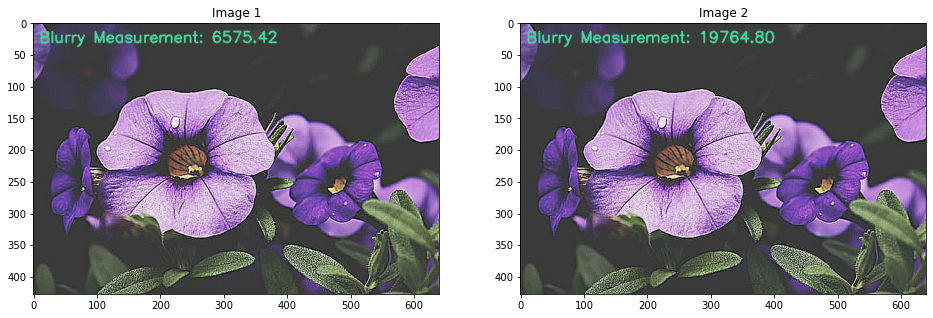

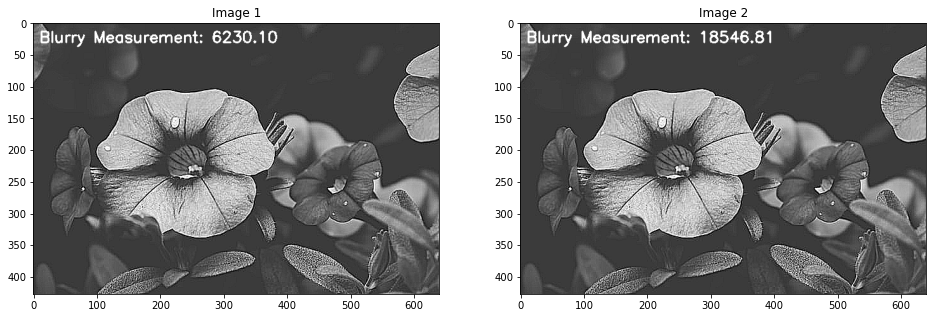

In [15]:
text = "Blurry Measurement"
img_color_filter_33_text = text_img(img_color_sharpen_33, sm_color_33, text)
img__gray_filter_33_text = text_img(img_gray_sharpen_33, sm_gray_33, text, (255, 255, 255))
img_color_filter_55_text = text_img(img_color_sharpen_33, sm_color_55, text)
img__gray_filter_55_text = text_img(img_gray_sharpen_33, sm_gray_55, text, (255, 255, 255))

ShowTwoImages(img_color_filter_33_text, img_color_filter_55_text)
ShowTwoImages(img__gray_filter_33_text, img__gray_filter_55_text)

## Bài tập 3
**Tạo một thư mục ảnh gồm 5 ảnh (kiếm từ internet)**

**Viết hàm đọc toàn bộ ảnh trong thư mục "Image_Input" đó vào một List ảnh.**

In [16]:
def read_folder_image(path):
    FJoin = os.path.join
    files = [FJoin(path, f) for f in os.listdir(path)]
    imgs = []
    for path in files:
        imgs.append(imread(path))
    return imgs

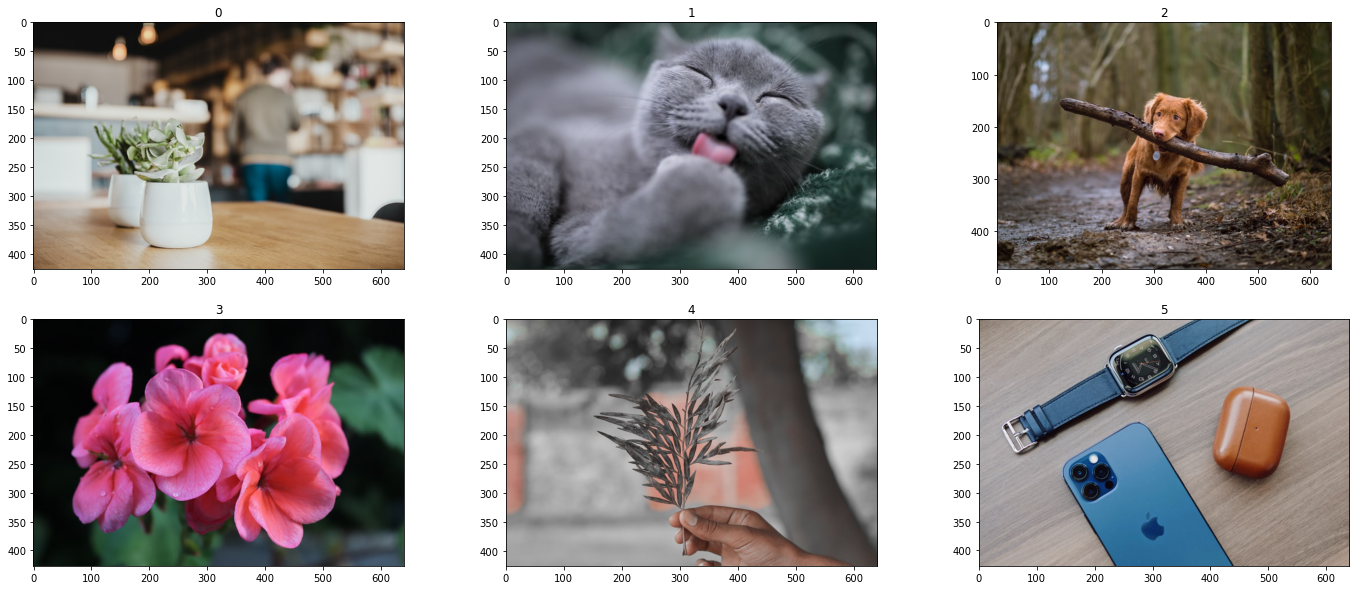

In [17]:
path = "Image_Input"
list_imgs = read_folder_image(path)
ShowListImages(list_imgs, len(list_imgs)//3, 3)

**Định nghĩa ngưỡng mờ.**

In [18]:
def blur_measurement_list_image(list_imgs):
    blur_measurements = []
    for img in list_imgs:
        blur_measurements.append(variance_of_laplacian(img))
    return blur_measurements

In [19]:
blur_measurements = blur_measurement_list_image(list_imgs)
for i in range(len(blur_measurements)):
    print("Blurry measurement of image {}: {}".format(i, blur_measurements[i]))

Blurry measurement of image 0: 83.4678580483845
Blurry measurement of image 1: 82.5016962650677
Blurry measurement of image 2: 351.6361815917505
Blurry measurement of image 3: 72.18180837304992
Blurry measurement of image 4: 329.3180613986276
Blurry measurement of image 5: 524.6676143846438


In [20]:
default_measurement = 200

**Đọc lần lượt các ảnh: nếu ảnh nào ngoài ngưỡng mờ ta ghi một dòng thông tin trên ảnh là “Blur Image :” kèm giá trị mờ. Nếu ảnh nào tốt thì ta ghi “Good Image” trên ảnh.**

In [21]:
def to_list_text_img(list_imgs, blur_measurements, default_measurement):
    text_imgs = []
    for i in range(len(blur_measurements)):
        if blur_measurements[i] < default_measurement:
            text_imgs.append(text_img(list_imgs[i], blur_measurements[i], "Blur Image"))
        else:
            text_imgs.append(text_img(list_imgs[i], text = "Good Image"))
    return text_imgs

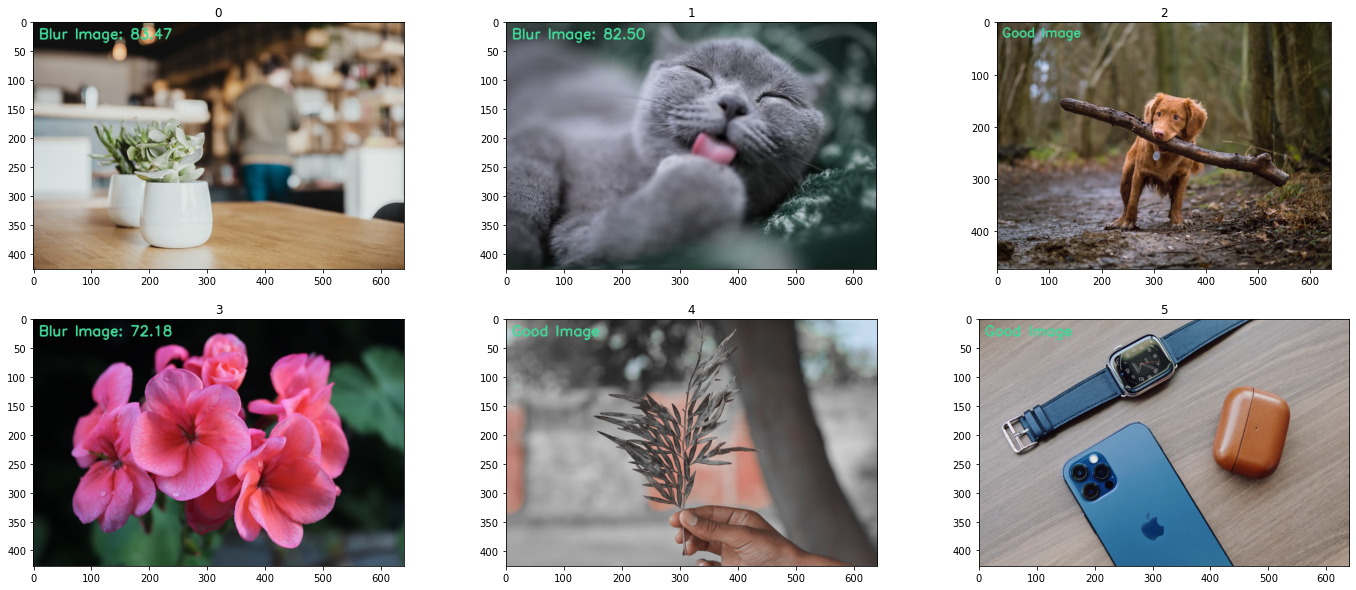

In [22]:
text_imgs = to_list_text_img(list_imgs, blur_measurements, default_measurement)
ShowListImages(text_imgs, len(text_imgs)//3 , 3)

**Tất cả các ảnh sau khi đánh giá được lưu vào một thư mục "Image_BlurDetection_Output"**

In [23]:
path = 'Image_BlurDetection_Output'
os.mkdir(path)
for i in range(len(text_imgs)):
    imsave(os.path.join(path, '{}.jpg'.format(i)), text_imgs[i])

## Bài tập 4
**Tìm 1 ảnh trên internet và thực hiện các bước sau**

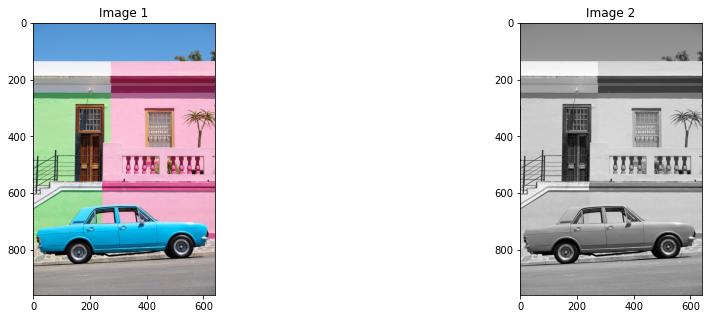

In [24]:
# Read Image
img_color, img_gray = read_image("color2.jpg")[:2]
# Display Image
ShowTwoImages(img_color, img_gray)

**Xuất ảnh từng điểm ảnh hiển thị giá trị RGBMax.**

In [25]:
def max_rgb_filter(image):
    # split the image into its BGR components
    (B, G, R) = cv2.split(image)
    # find the maximum pixel intensity values for each
    # (x, y)-coordinate,, then set all pixel values less
    # than M to zero
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0
    # merge the channels back together and return the image
    return cv2.merge([B, G, R])

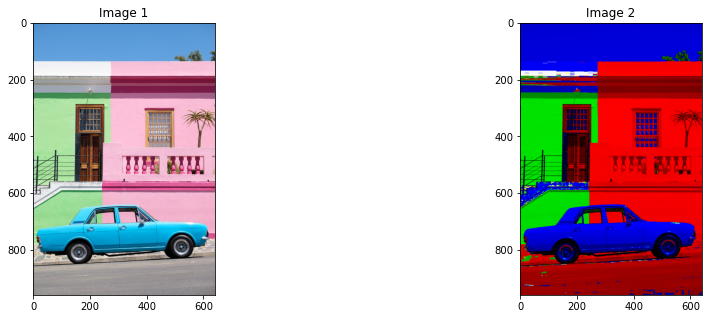

In [26]:
img_color_rgbmax = max_rgb_filter(img_color)
ShowTwoImages(img_color, img_color_rgbmax)

**Xuất các vị trí có giá trị R đạt max, G đạt max và B đạt max.**

In [27]:
def SegmentColorImageByMask(IM, Mask):
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

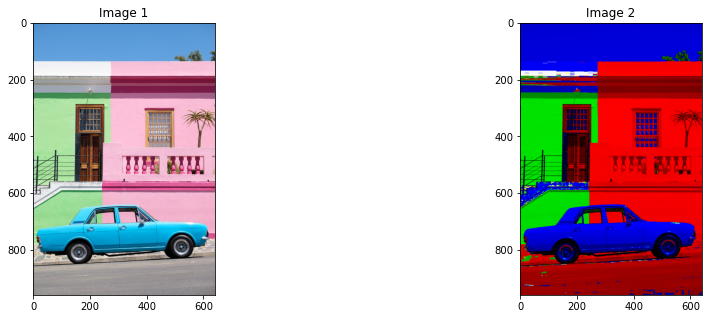

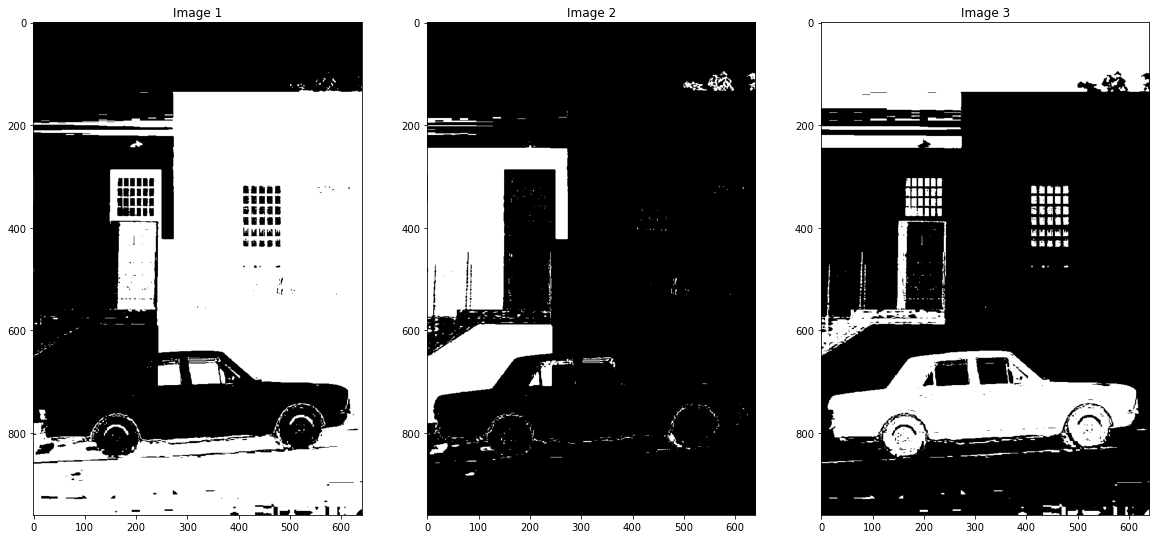

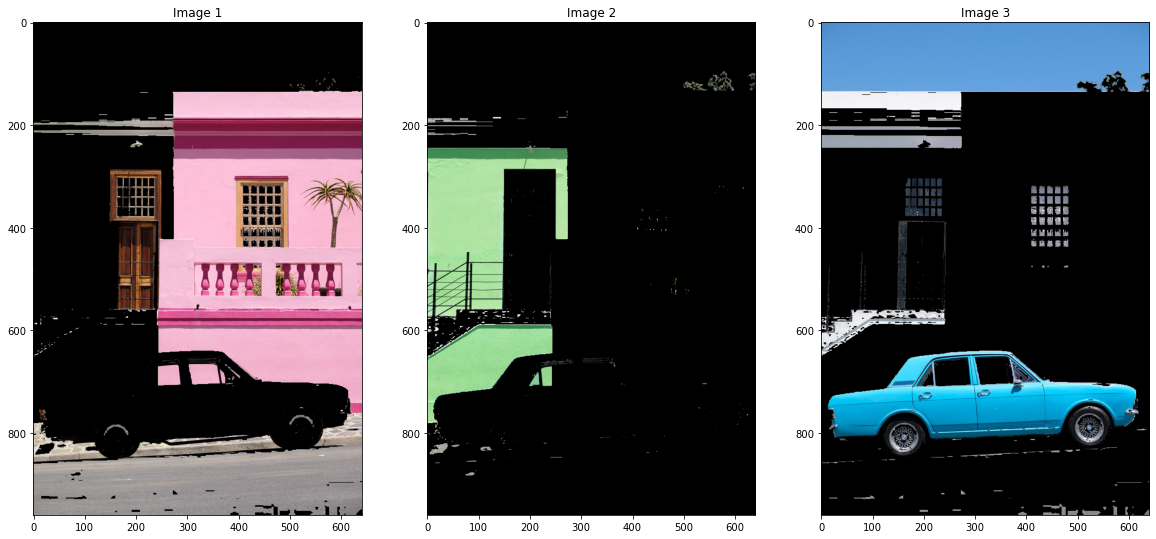

In [28]:
img_maxR_mask = img_gray < 0
img_maxG_mask = img_gray < 0
img_maxB_mask = img_gray < 0

R = img_color_rgbmax[:,:,0]
G = img_color_rgbmax[:,:,1]
B = img_color_rgbmax[:,:,2]

img_maxR_mask[(G == 0) & (B == 0)] = 1
img_maxG_mask[(R == 0) & (B == 0)] = 1
img_maxB_mask[(G == 0) & (R == 0)] = 1

img_maxR = SegmentColorImageByMask(img_color, img_maxR_mask)
img_maxG = SegmentColorImageByMask(img_color, img_maxG_mask)
img_maxB = SegmentColorImageByMask(img_color, img_maxB_mask)

ShowTwoImages(img_color, img_color_rgbmax)
ShowThreeImages(img_maxR_mask, img_maxG_mask, img_maxB_mask)
ShowThreeImages(img_maxR, img_maxG, img_maxB)

**Thưc hiện làm mờ ảnh rồi sau đó làm rõ ảnh và so sánh giá trị độ đo mờ có giống ảnh gốc không.**

In [29]:
size = (5, 5)
blur_img = cv2.blur(img_color, size)
sharpen_img = cv2.filter2D(blur_img, -1, kernel_sharpen(size))
print("Blur Measurement of original image:", variance_of_laplacian(img_color))
print("Blur Measurement of image after blurring and sharpening:", variance_of_laplacian(sharpen_img))

Blur Measurement of original image: 1112.2589788917066
Blur Measurement of image after blurring and sharpening: 6794.790393506499


In [30]:
size = (5, 5)
sharpen_img = cv2.filter2D(img_color, -1, kernel_sharpen(size))
blur_img = cv2.blur(sharpen_img, size)
print("Blur Measurement of original image:", variance_of_laplacian(img_color))
print("Blur Measurement of image after sharpening and blurring:", variance_of_laplacian(blur_img))

Blur Measurement of original image: 1112.2589788917066
Blur Measurement of image after sharpening and blurring: 615.8749807098764


**Tìm cạnh và tạo ra các ảnh về cạnh sau : ảnh cạnh ngang, cạnh dọc và ảnh cạnh tổng.**

In [31]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
# construct the Sobel x-axis kernel
kernel_sobelX = np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel
kernel_sobelY = np.array((
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]), dtype="int")

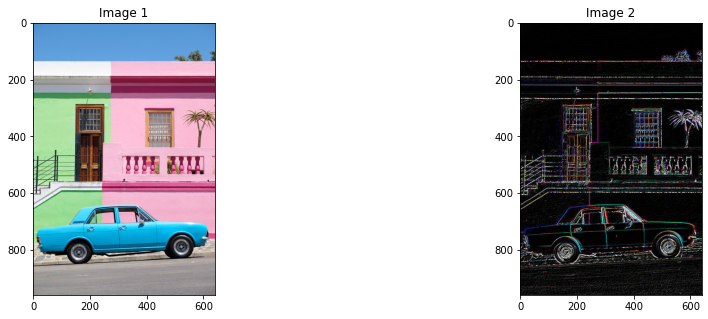

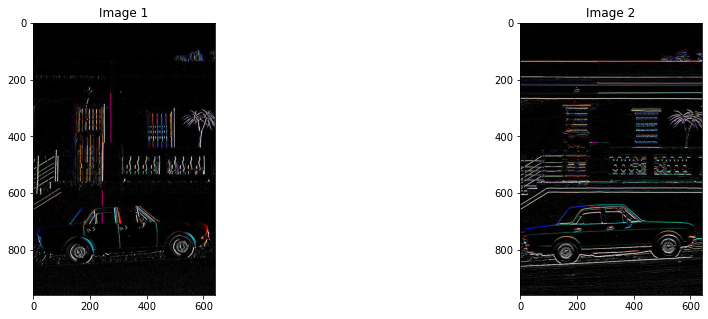

In [32]:
img_color_edge_sobelX = cv2.filter2D(img_color, -1, kernel_sobelX)
img_color_edge_sobelY = cv2.filter2D(img_color, -1, kernel_sobelY)
img_color_edge = img_color_edge_sobelX + img_color_edge_sobelY

ShowTwoImages(img_color, img_color_edge)
ShowTwoImages(img_color_edge_sobelX, img_color_edge_sobelY)

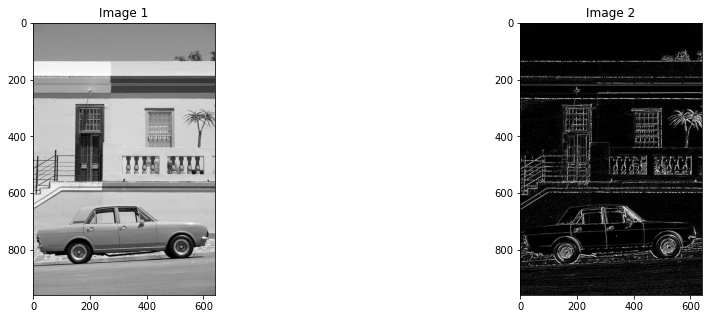

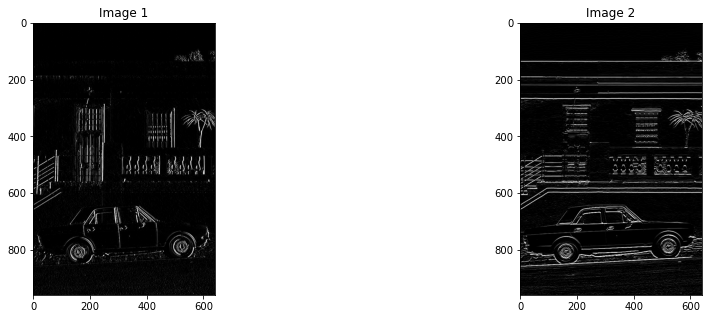

In [33]:
img_gray_edge_sobelX = cv2.filter2D(img_gray, -1, kernel_sobelX)
img_gray_edge_sobelY = cv2.filter2D(img_gray, -1, kernel_sobelY)
img_gray_edge = img_gray_edge_sobelX + img_gray_edge_sobelY

ShowTwoImages(img_gray, img_gray_edge)
ShowTwoImages(img_gray_edge_sobelX, img_gray_edge_sobelY)